# Módulo 6 tarefa 1

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esses arquivos.

In [3]:
import pandas as pd
import requests
from io import BytesIO
import matplotlib.pyplot as plt

# URL do arquivo CSV
url_csv = "https://diaad.s3.sa-east-1.amazonaws.com/sinasc/SINASC_2019.csv"

# Baixar o arquivo CSV
response = requests.get(url_csv)
csv_data = BytesIO(response.content)

# Carregar os dados usando o pandas
sinasc_data = pd.read_csv(csv_data)

# Exibir as primeiras linhas do DataFrame
print(sinasc_data.head())


  ORIGEM;"CODESTAB";"CODMUNNASC";"LOCNASC";"IDADEMAE";"ESTCIVMAE";"ESCMAE";"CODOCUPMAE";"QTDFILVIVO";"QTDFILMORT";"CODMUNRES";"GESTACAO";"GRAVIDEZ";"PARTO";"CONSULTAS";"DTNASC";"HORANASC";"SEXO";"APGAR1";"APGAR5";"RACACOR";"PESO";"IDANOMAL";"DTCADASTRO";"CODANOMAL";"NUMEROLOTE";"VERSAOSIST";"DTRECEBIM";"DIFDATA";"DTRECORIGA";"NATURALMAE";"CODMUNNATU";"CODUFNATU";"ESCMAE2010";"SERIESCMAE";"DTNASCMAE";"RACACORMAE";"QTDGESTANT";"QTDPARTNOR";"QTDPARTCES";"IDADEPAI";"DTULTMENST";"SEMAGESTAC";"TPMETESTIM";"CONSPRENAT";"MESPRENAT";"TPAPRESENT";"STTRABPART";"STCESPARTO";"TPNASCASSI";"TPFUNCRESP";"TPDOCRESP";"DTDECLARAC";"ESCMAEAGR1";"STDNEPIDEM";"STDNNOVA";"CODPAISRES";"TPROBSON";"PARIDADE";"KOTELCHUCK";"CONTADOR"
0  1;"2515504";"110002";"1";"31";"2";"5";"999992"...                                                                                                                                                                                                                                        

####  2) Monte um gráficos de barras com as variáveis APGAR1, APGAR5, SEXO, GESTACAO, ESTCIVMAE.

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados do CSV com ponto e vírgula como delimitador
url_csv = "https://diaad.s3.sa-east-1.amazonaws.com/sinasc/SINASC_2019.csv"
sinasc_data = pd.read_csv(url_csv, delimiter=';')

# Remover as aspas duplas dos nomes das colunas
sinasc_data.columns = sinasc_data.columns.str.strip('"')

# Exibir as primeiras linhas do DataFrame
print(sinasc_data.head())

<ipython-input-10-326d2616c00c>:6: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
  sinasc_data = pd.read_csv(url_csv, delimiter=';')


   ORIGEM   CODESTAB  CODMUNNASC  LOCNASC  IDADEMAE  ESTCIVMAE  ESCMAE  \
0       1  2515504.0      110002        1      31.0        2.0     5.0   
1       1  2516292.0      110015        1      34.0        4.0     4.0   
2       1  5618347.0      110020        1      35.0        2.0     4.0   
3       1  5618347.0      110020        1      26.0        5.0     5.0   
4       1  5618347.0      110020        1      23.0        5.0     3.0   

   CODOCUPMAE  QTDFILVIVO  QTDFILMORT  ...  TPDOCRESP  DTDECLARAC  ESCMAEAGR1  \
0    999992.0         1.0         0.0  ...        0.0         NaN         8.0   
1    621005.0         1.0         0.0  ...        3.0  27042019.0        12.0   
2    621005.0         1.0         0.0  ...        3.0  26012019.0        12.0   
3         NaN         1.0         NaN  ...        3.0   2032019.0         7.0   
4    999992.0         4.0         0.0  ...        3.0  30032019.0         2.0   

   STDNEPIDEM  STDNNOVA  CODPAISRES  TPROBSON  PARIDADE  KOTELCHUCK 

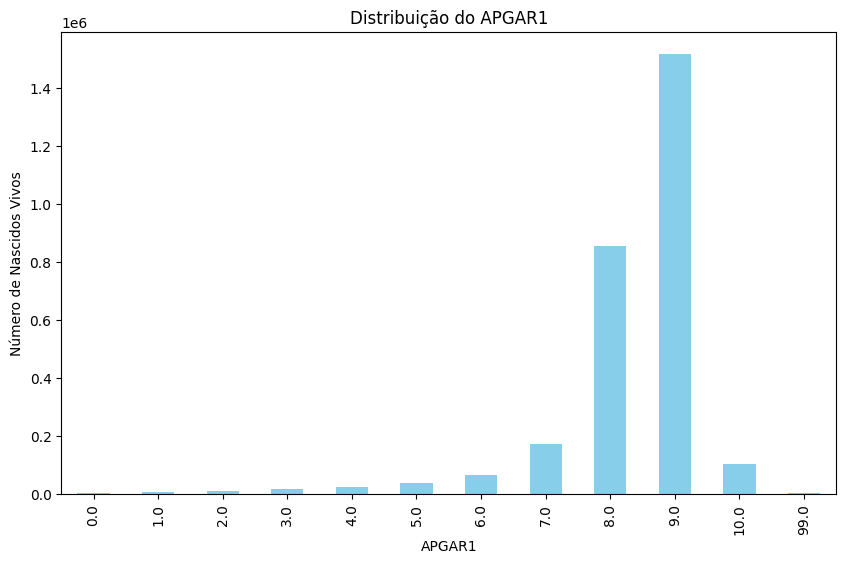

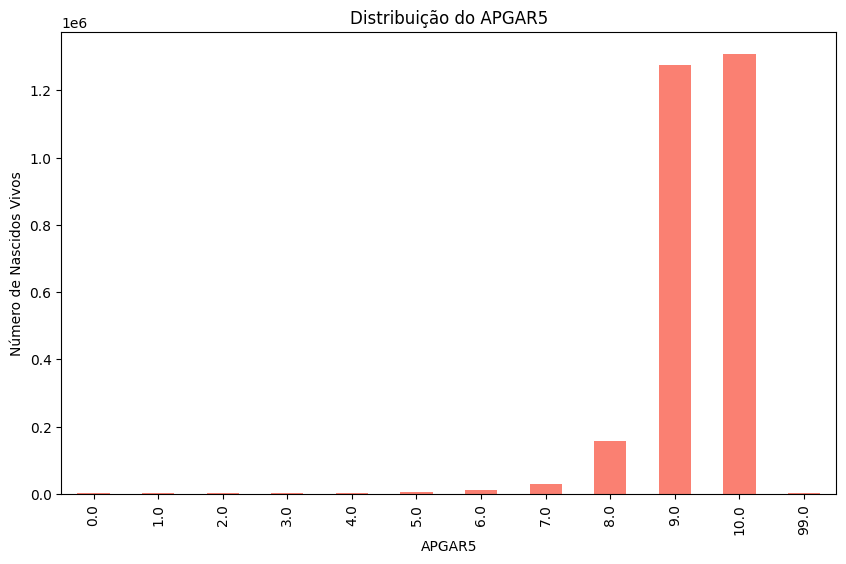

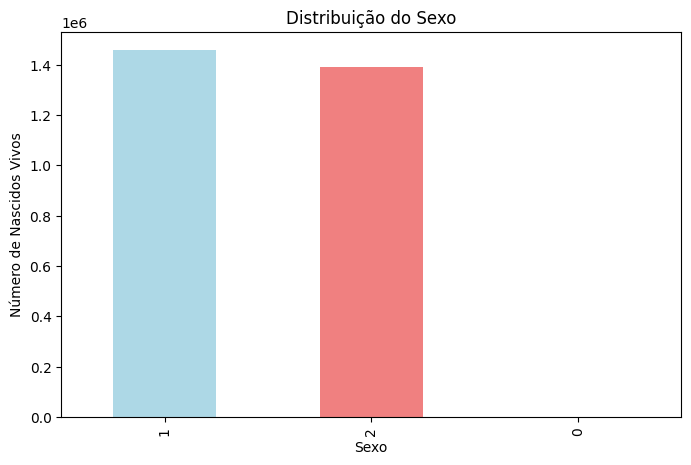

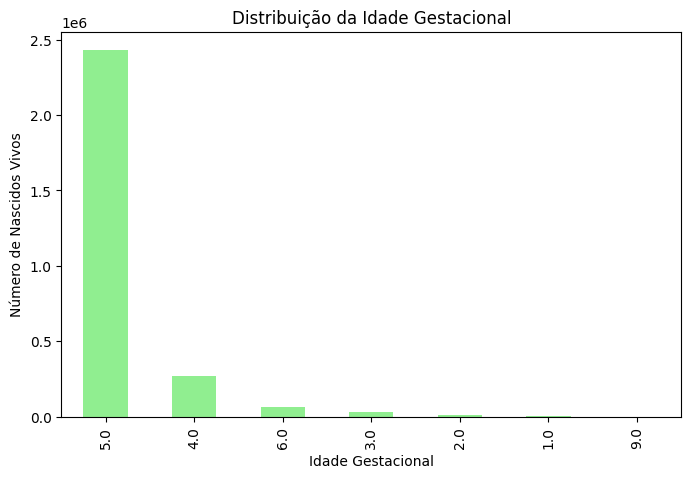

Text(0, 0.5, 'Número de Nascidos Vivos')

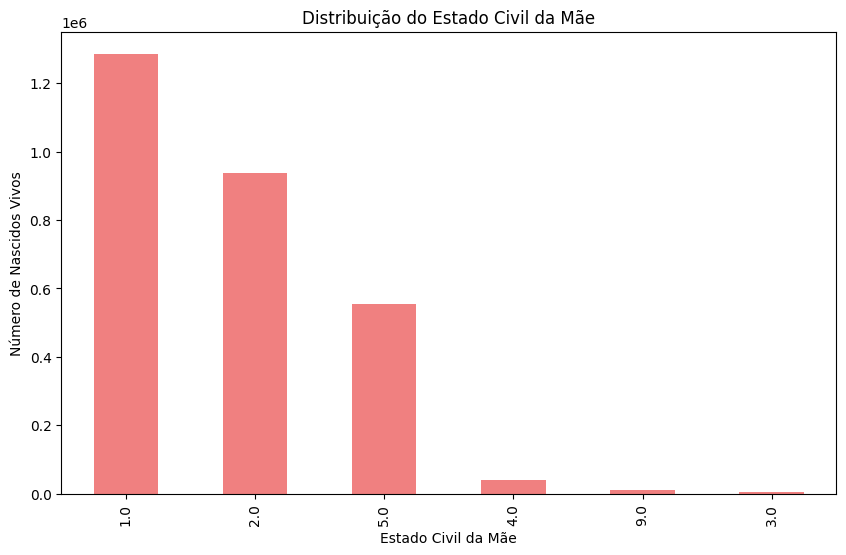

In [12]:
# Gráfico de barras para APGAR1
plt.figure(figsize=(10, 6))
sinasc_data['APGAR1'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribuição do APGAR1')
plt.xlabel('APGAR1')
plt.ylabel('Número de Nascidos Vivos')
plt.show()
# Gráfico de barras para APGAR5
plt.figure(figsize=(10, 6))
sinasc_data['APGAR5'].value_counts().sort_index().plot(kind='bar', color='salmon')
plt.title('Distribuição do APGAR5')
plt.xlabel('APGAR5')
plt.ylabel('Número de Nascidos Vivos')
plt.show()

# Gráfico de barras para SEXO
plt.figure(figsize=(8, 5))
sinasc_data['SEXO'].value_counts().plot(kind='bar', color=['lightblue', 'lightcoral'])
plt.title('Distribuição do Sexo')
plt.xlabel('Sexo')
plt.ylabel('Número de Nascidos Vivos')
plt.show()

# Gráfico de barras para GESTACAO
plt.figure(figsize=(8, 5))
sinasc_data['GESTACAO'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Distribuição da Idade Gestacional')
plt.xlabel('Idade Gestacional')
plt.ylabel('Número de Nascidos Vivos')
plt.show()

# Gráfico de barras para ESTCIVMAE
plt.figure(figsize=(10, 6))
sinasc_data['ESTCIVMAE'].value_counts().plot(kind='bar', color='lightcoral')
plt.title('Distribuição do Estado Civil da Mãe')
plt.xlabel('Estado Civil da Mãe')
plt.ylabel('Número de Nascidos Vivos')

#### 3) Monte um gráfico de barras mostrando o APGAR5 médio por CONSULTAS

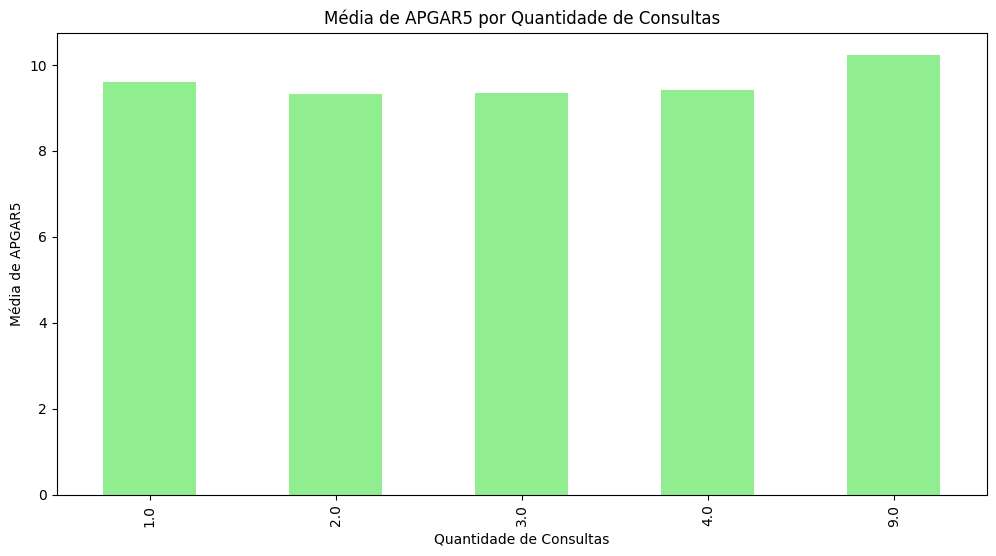

In [13]:
# Converter a coluna 'CONSULTAS' para numérica
sinasc_data['CONSULTAS'] = pd.to_numeric(sinasc_data['CONSULTAS'], errors='coerce')

# Gráfico de barras da média de APGAR5 por quantidade de consultas
avg_apgar5_by_consultas = sinasc_data.groupby('CONSULTAS')['APGAR5'].mean()

plt.figure(figsize=(12, 6))
avg_apgar5_by_consultas.plot(kind='bar', color='lightgreen')
plt.title('Média de APGAR5 por Quantidade de Consultas')
plt.xlabel('Quantidade de Consultas')
plt.ylabel('Média de APGAR5')
plt.show()


####  4) Monte um painel com 4 gráficos mostrando as frequencias de SEXO, GESTACAO, ESTCIVMAE e CONSULTAS

<ipython-input-15-bea018776ace>:7: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
  sinasc_data = pd.read_csv(url_csv, delimiter=';')


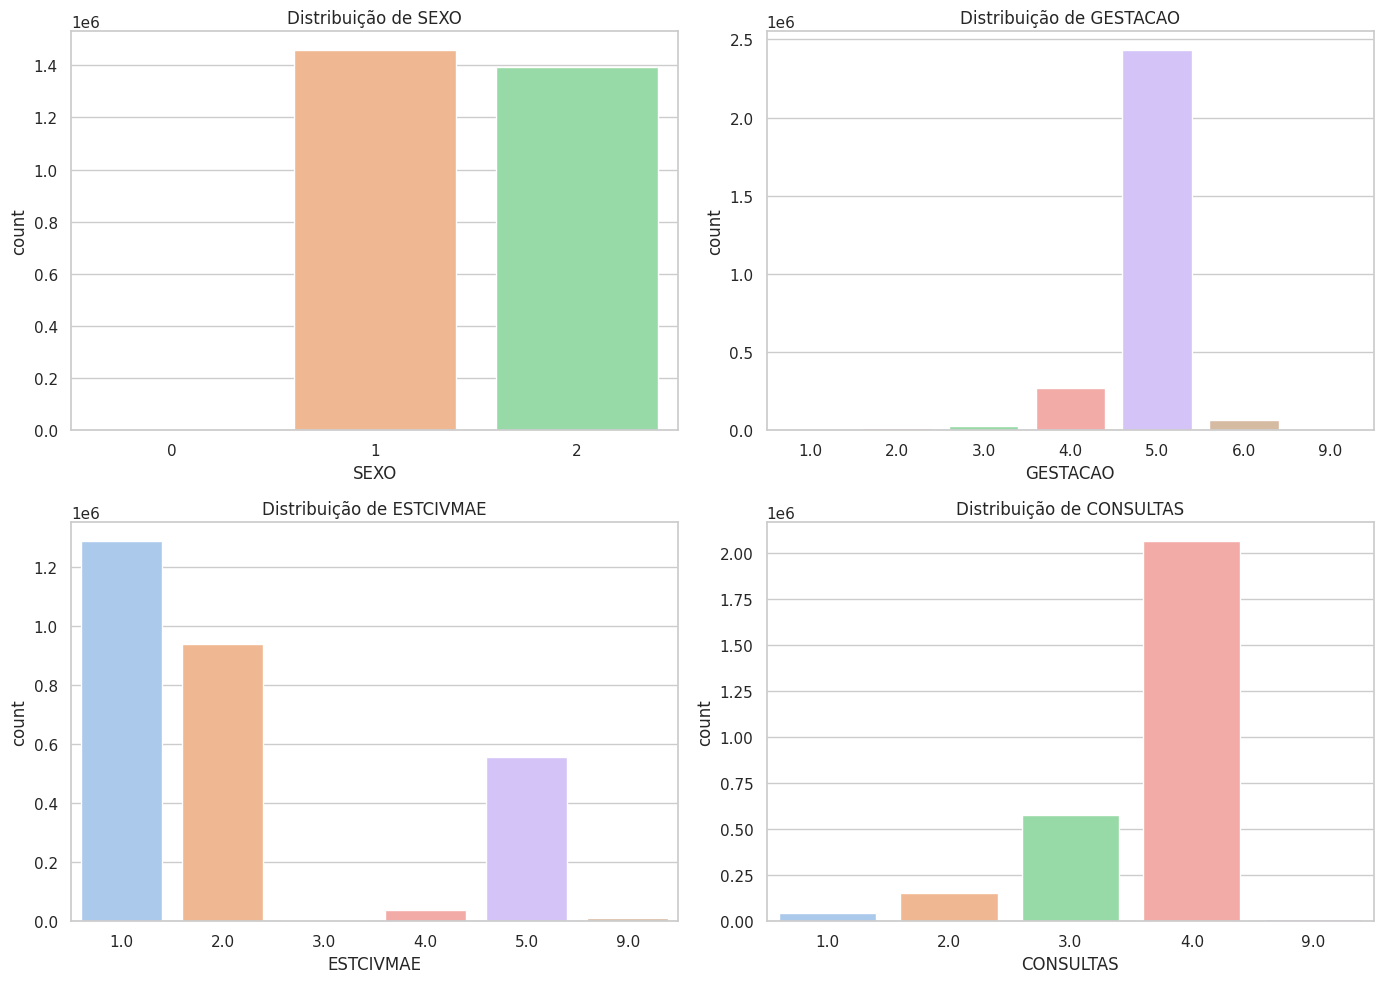

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar os dados do CSV com ponto e vírgula como delimitador
url_csv = "https://diaad.s3.sa-east-1.amazonaws.com/sinasc/SINASC_2019.csv"
sinasc_data = pd.read_csv(url_csv, delimiter=';')

# Remover as aspas duplas dos nomes das colunas
sinasc_data.columns = sinasc_data.columns.str.strip('"')

# Converter a coluna 'CONSULTAS' para numérica
sinasc_data['CONSULTAS'] = pd.to_numeric(sinasc_data['CONSULTAS'], errors='coerce')

# Configurar o estilo do seaborn
sns.set(style="whitegrid")

# Criar um painel com 2 linhas e 2 colunas de gráficos
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# Gráfico de contagem para SEXO
sns.countplot(x='SEXO', data=sinasc_data, ax=axes[0, 0], palette='pastel')
axes[0, 0].set_title('Distribuição de SEXO')

# Gráfico de contagem para GESTACAO
sns.countplot(x='GESTACAO', data=sinasc_data, ax=axes[0, 1], palette='pastel')
axes[0, 1].set_title('Distribuição de GESTACAO')

# Gráfico de contagem para ESTCIVMAE
sns.countplot(x='ESTCIVMAE', data=sinasc_data, ax=axes[1, 0], palette='pastel')
axes[1, 0].set_title('Distribuição de ESTCIVMAE')

# Gráfico de contagem para CONSULTAS
sns.countplot(x='CONSULTAS', data=sinasc_data, ax=axes[1, 1], palette='pastel')
axes[1, 1].set_title('Distribuição de CONSULTAS')

# Ajustar o layout
plt.tight_layout()

# Mostrar o painel de gráficos
plt.show()



<ipython-input-17-5592adbc0837>:13: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
  sinasc_data = pd.read_csv(csv_data, delimiter=';')


   ORIGEM   CODESTAB  CODMUNNASC  LOCNASC  IDADEMAE  ESTCIVMAE  ESCMAE  \
0       1  2515504.0      110002        1      31.0        2.0     5.0   
1       1  2516292.0      110015        1      34.0        4.0     4.0   
2       1  5618347.0      110020        1      35.0        2.0     4.0   
3       1  5618347.0      110020        1      26.0        5.0     5.0   
4       1  5618347.0      110020        1      23.0        5.0     3.0   

   CODOCUPMAE  QTDFILVIVO  QTDFILMORT  ...  TPDOCRESP  DTDECLARAC  ESCMAEAGR1  \
0    999992.0         1.0         0.0  ...        0.0         NaN         8.0   
1    621005.0         1.0         0.0  ...        3.0  27042019.0        12.0   
2    621005.0         1.0         0.0  ...        3.0  26012019.0        12.0   
3         NaN         1.0         NaN  ...        3.0   2032019.0         7.0   
4    999992.0         4.0         0.0  ...        3.0  30032019.0         2.0   

   STDNEPIDEM  STDNNOVA  CODPAISRES  TPROBSON  PARIDADE  KOTELCHUCK 

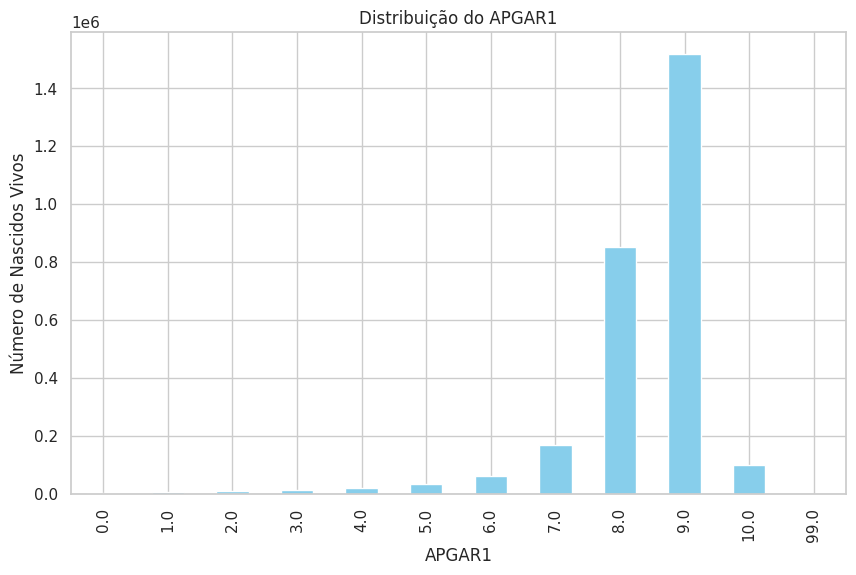

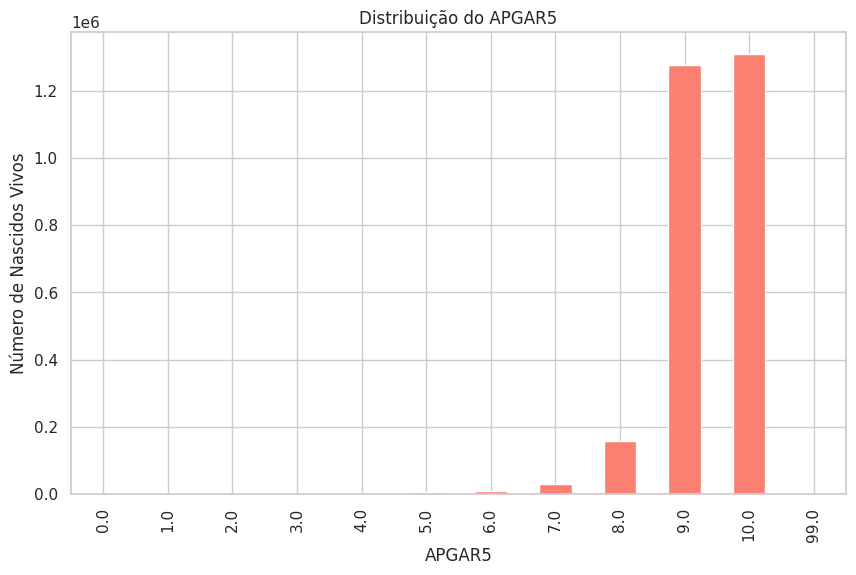

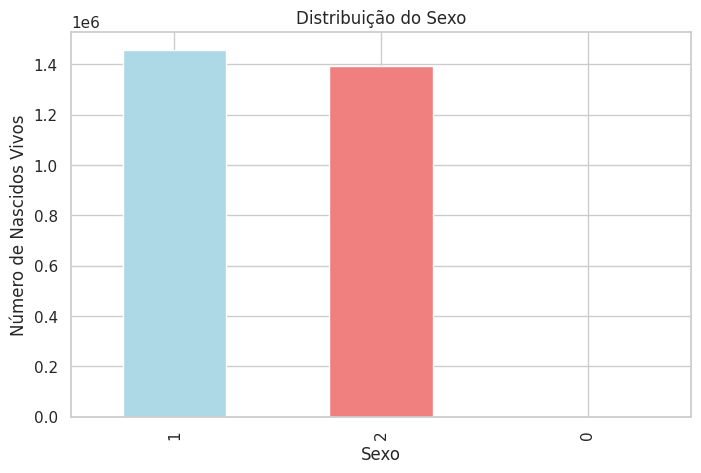

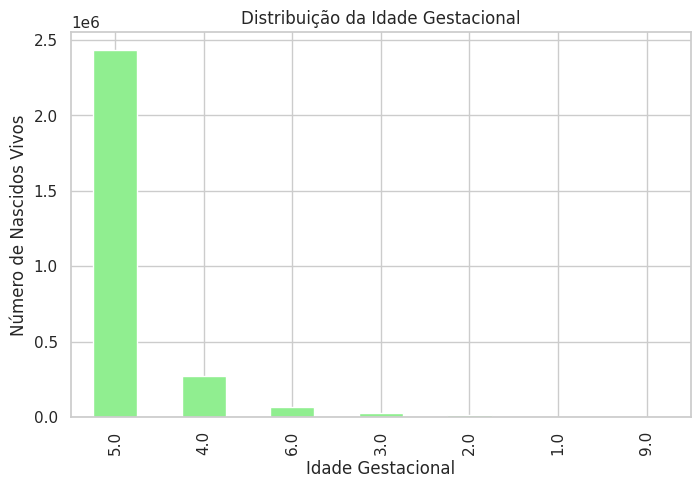

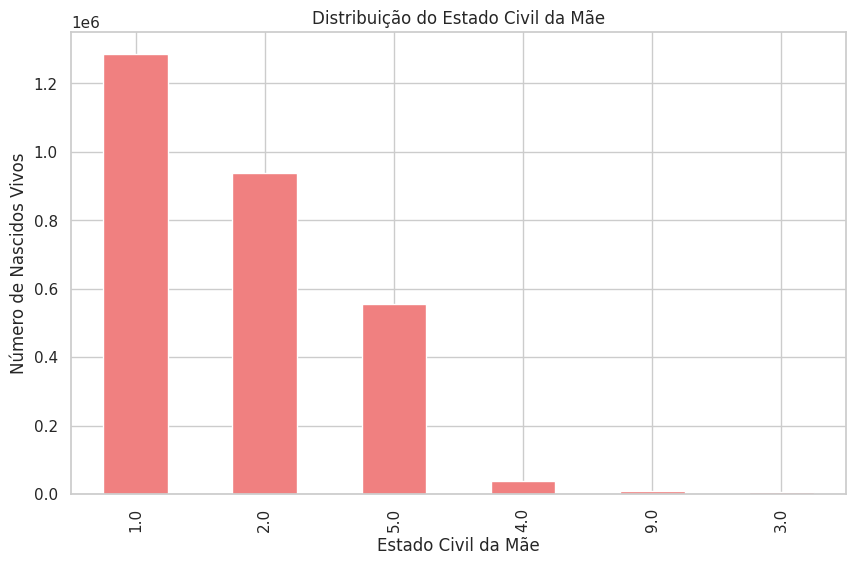

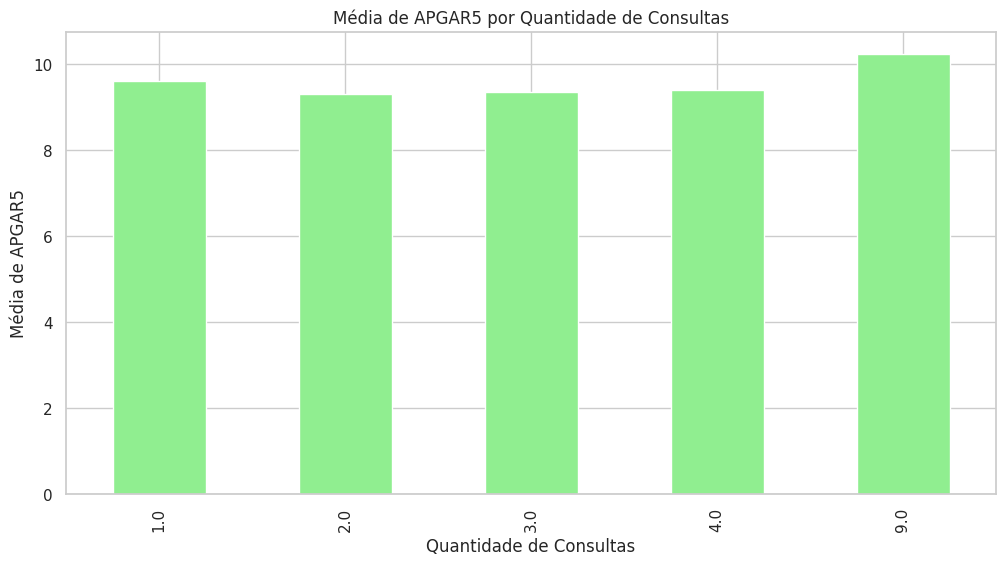

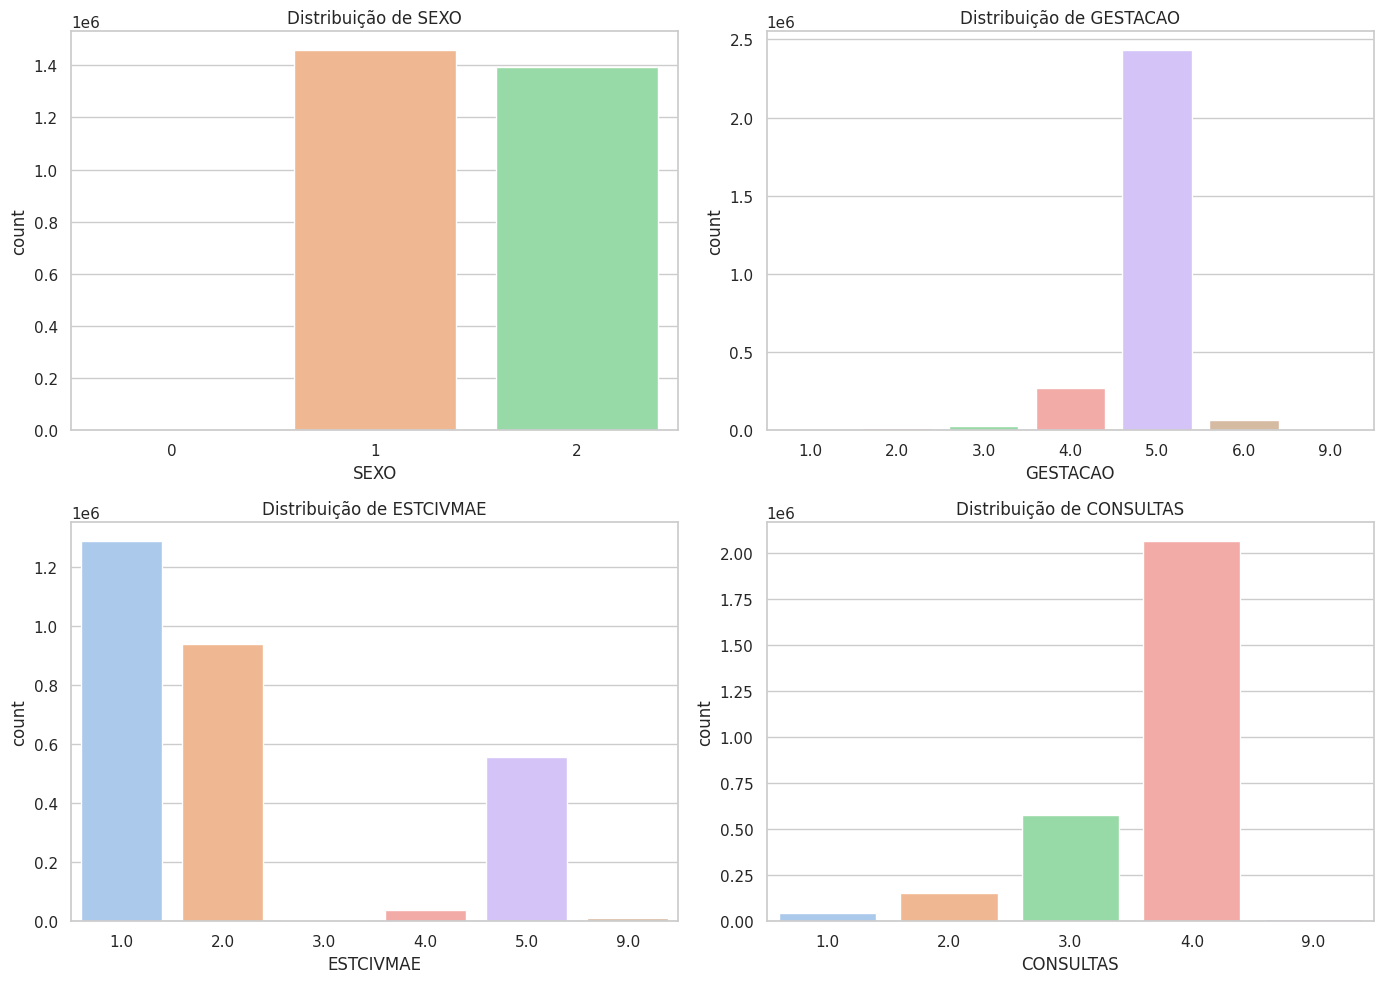

In [17]:
import pandas as pd
import requests
from io import BytesIO
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os dados do CSV com ponto e vírgula como delimitador
url_csv = "https://diaad.s3.sa-east-1.amazonaws.com/sinasc/SINASC_2019.csv"
response = requests.get(url_csv)
csv_data = BytesIO(response.content)

# Carregar os dados usando o pandas
sinasc_data = pd.read_csv(csv_data, delimiter=';')

# Remover as aspas duplas dos nomes das colunas
sinasc_data.columns = sinasc_data.columns.str.strip('"')

# Exibir as primeiras linhas do DataFrame
print(sinasc_data.head())

# Gráfico de barras para APGAR1
plt.figure(figsize=(10, 6))
sinasc_data['APGAR1'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribuição do APGAR1')
plt.xlabel('APGAR1')
plt.ylabel('Número de Nascidos Vivos')
plt.show()

# Gráfico de barras para APGAR5
plt.figure(figsize=(10, 6))
sinasc_data['APGAR5'].value_counts().sort_index().plot(kind='bar', color='salmon')
plt.title('Distribuição do APGAR5')
plt.xlabel('APGAR5')
plt.ylabel('Número de Nascidos Vivos')
plt.show()

# Gráfico de barras para SEXO
plt.figure(figsize=(8, 5))
sinasc_data['SEXO'].value_counts().plot(kind='bar', color=['lightblue', 'lightcoral'])
plt.title('Distribuição do Sexo')
plt.xlabel('Sexo')
plt.ylabel('Número de Nascidos Vivos')
plt.show()

# Gráfico de barras para GESTACAO
plt.figure(figsize=(8, 5))
sinasc_data['GESTACAO'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Distribuição da Idade Gestacional')
plt.xlabel('Idade Gestacional')
plt.ylabel('Número de Nascidos Vivos')
plt.show()

# Gráfico de barras para ESTCIVMAE
plt.figure(figsize=(10, 6))
sinasc_data['ESTCIVMAE'].value_counts().plot(kind='bar', color='lightcoral')
plt.title('Distribuição do Estado Civil da Mãe')
plt.xlabel('Estado Civil da Mãe')
plt.ylabel('Número de Nascidos Vivos')

# Converter a coluna 'CONSULTAS' para numérica
sinasc_data['CONSULTAS'] = pd.to_numeric(sinasc_data['CONSULTAS'], errors='coerce')

# Gráfico de barras da média de APGAR5 por quantidade de consultas
avg_apgar5_by_consultas = sinasc_data.groupby('CONSULTAS')['APGAR5'].mean()

plt.figure(figsize=(12, 6))
avg_apgar5_by_consultas.plot(kind='bar', color='lightgreen')
plt.title('Média de APGAR5 por Quantidade de Consultas')
plt.xlabel('Quantidade de Consultas')
plt.ylabel('Média de APGAR5')
plt.show()

# Configurar o estilo do seaborn
sns.set(style="whitegrid")

# Criar um painel com 2 linhas e 2 colunas de gráficos
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# Gráfico de contagem para SEXO
sns.countplot(x='SEXO', data=sinasc_data, ax=axes[0, 0], palette='pastel')
axes[0, 0].set_title('Distribuição de SEXO')

# Gráfico de contagem para GESTACAO
sns.countplot(x='GESTACAO', data=sinasc_data, ax=axes[0, 1], palette='pastel')
axes[0, 1].set_title('Distribuição de GESTACAO')

# Gráfico de contagem para ESTCIVMAE
sns.countplot(x='ESTCIVMAE', data=sinasc_data, ax=axes[1, 0], palette='pastel')
axes[1, 0].set_title('Distribuição de ESTCIVMAE')

# Gráfico de contagem para CONSULTAS
sns.countplot(x='CONSULTAS', data=sinasc_data, ax=axes[1, 1], palette='pastel')
axes[1, 1].set_title('Distribuição de CONSULTAS')

# Ajustar o layout
plt.tight_layout()

# Mostrar o painel de gráficos
plt.show()
